we'll follow these steps:

1. **Project Description**: We'll start by understanding the objective of the analysis.
2. **Data Import**: We'll load the data into a DataFrame.
3. **Data Description**: We'll inspect the data to understand its structure and characteristics.
4. **Exploratory Data Analysis (EDA)**: We'll explore the data to identify any patterns, correlations, and potential issues.
5. **Modeling Using K-Means**: We'll use K-Means clustering, applying PCA for dimensionality reduction, and the Elbow method to determine the optimal number of clusters.
6. **Clustering**: We'll apply the K-Means algorithm and analyze the results.

### 1. Project Description
This analysis aims to explore and segment countries based on various socio-economic and health-related indicators. Using unsupervised learning techniques, specifically K-Means clustering, we will group countries into clusters with similar characteristics. This can help in identifying patterns or groups of countries with similar development levels, health outcomes, or economic conditions.

### 2. Data Import


In [40]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/Country-data.csv')

# Display the first few rows of the dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



### 3. Data Description

Let's inspect the data to understand its structure, the types of variables it contains, and any potential issues:

In [41]:
# Get a summary of the dataset
df.info()

# Get descriptive statistics
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
Missing values in each column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



### 4. Exploratory Data Analysis (EDA)


#### 4.1 Distribution of Each Feature

We'll start by visualizing the distribution of each feature to understand their range and identify any potential outliers:


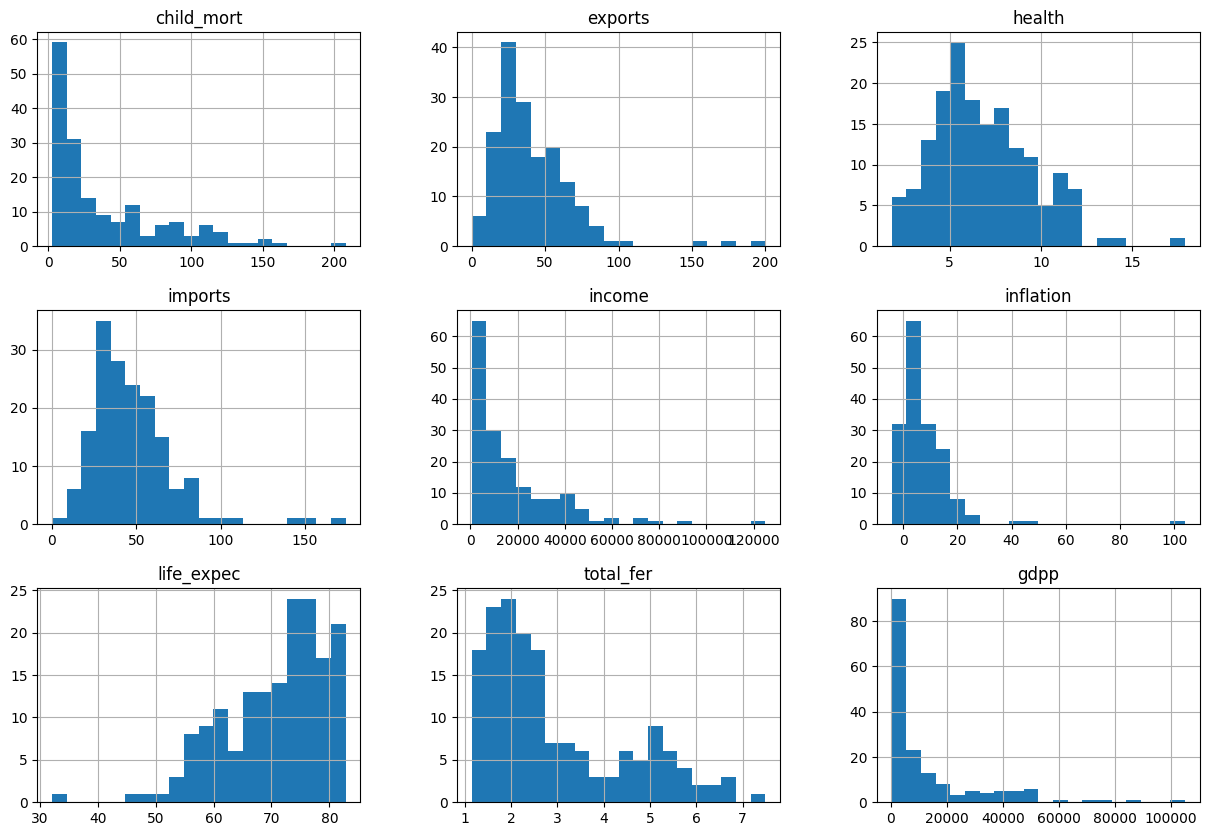

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for each feature
df.hist(figsize=(15, 10), bins=20)
plt.show()


#### 4.2 Correlation Heatmap

Next, we'll examine the correlation between features to understand how they relate to each other:

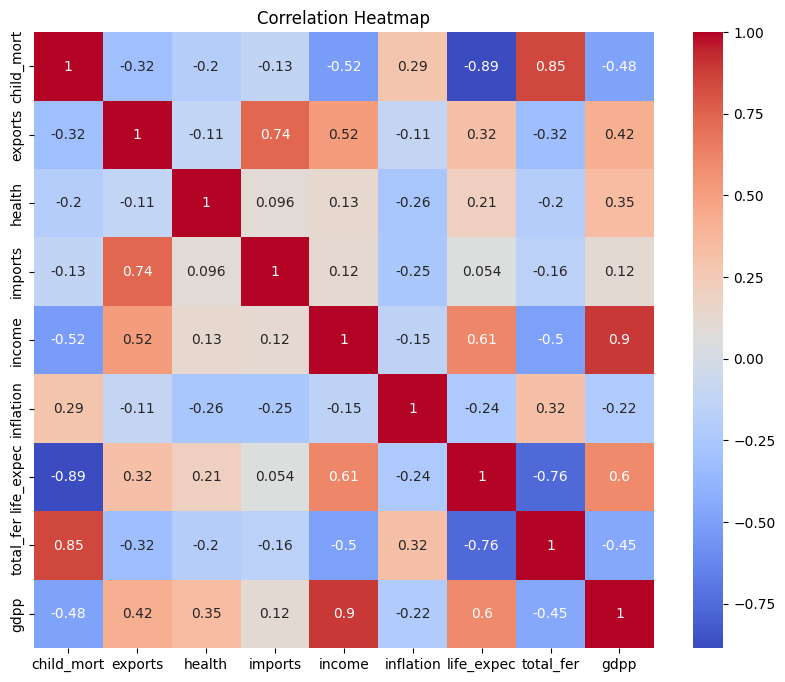

In [43]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Key Points on How Correlation Affects PCA:
1. **Highly Correlated Features**: If two or more features are highly correlated, PCA will likely combine them into a single principal component. For example, in your heatmap, "gdpp" and "income" are highly correlated (0.9). This suggests that they might contribute strongly to the same principal component.

2. **Uncorrelated Features**: Features that are uncorrelated with others might be spread across different principal components. For instance, "health" seems to have a low correlation with most other variables, indicating it might influence a separate principal component.

3. **Negative Correlations**: Negative correlations are also important. For example, "child_mort" has a strong negative correlation with "life_expec" (-0.89). PCA might create a component that reflects this inverse relationship, where one feature increases as the other decreases.

4. **Impact on Variance Explanation**: Features with high variance and strong correlations will contribute more to the first few principal components. Therefore, the direction and magnitude of correlations can influence how the variance is distributed across the components.


#### 4.3 Data Transformation

If the data shows significant differences in the range of values across features, we may need to normalize or scale the data before clustering:

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])


### 5. Modeling Using K-Means



#### 5.1 Principal Component Analysis (PCA)


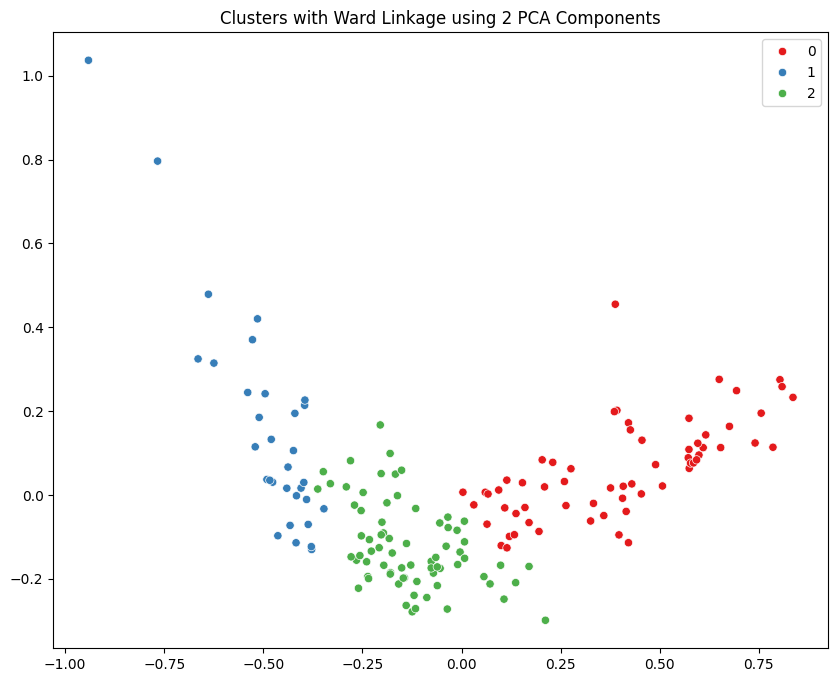

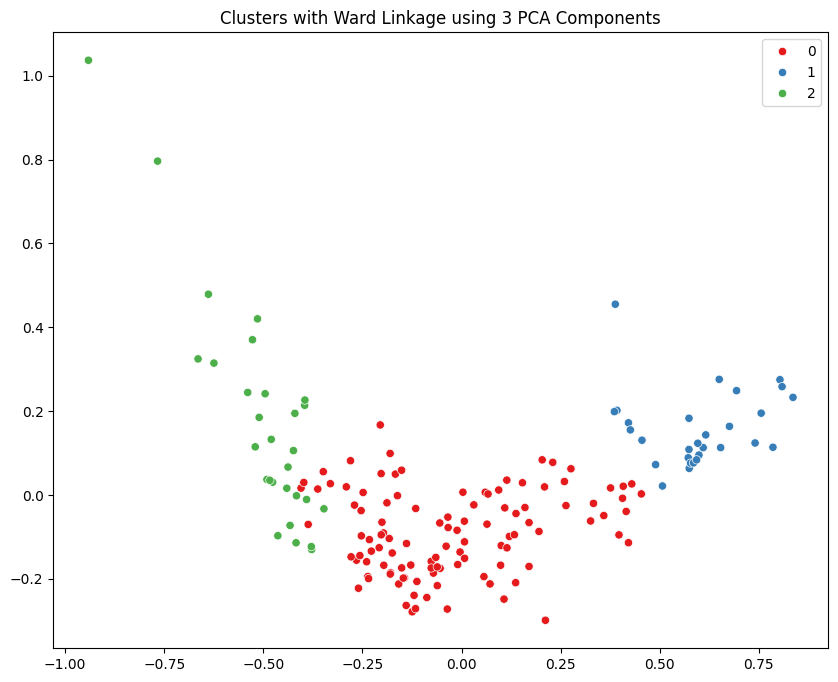

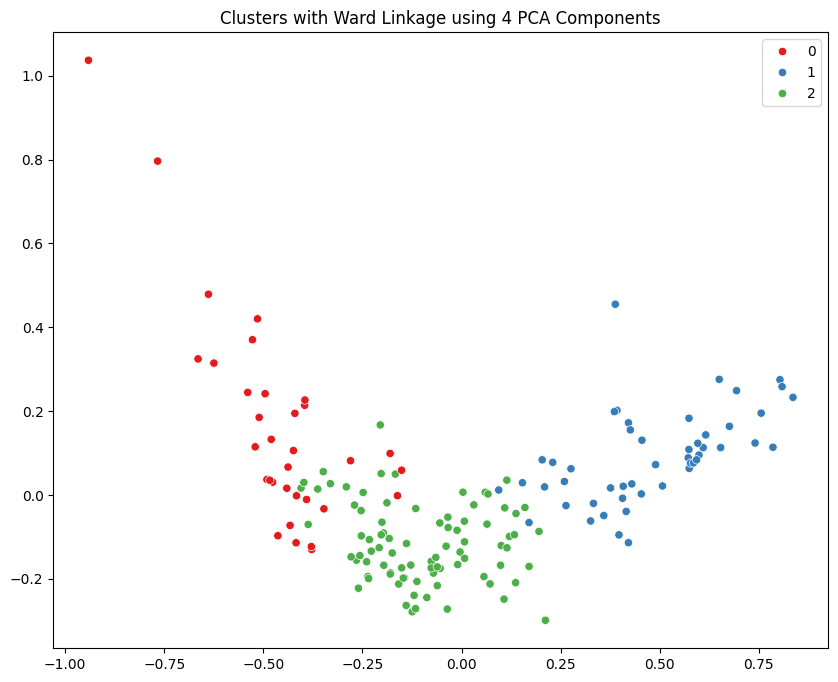

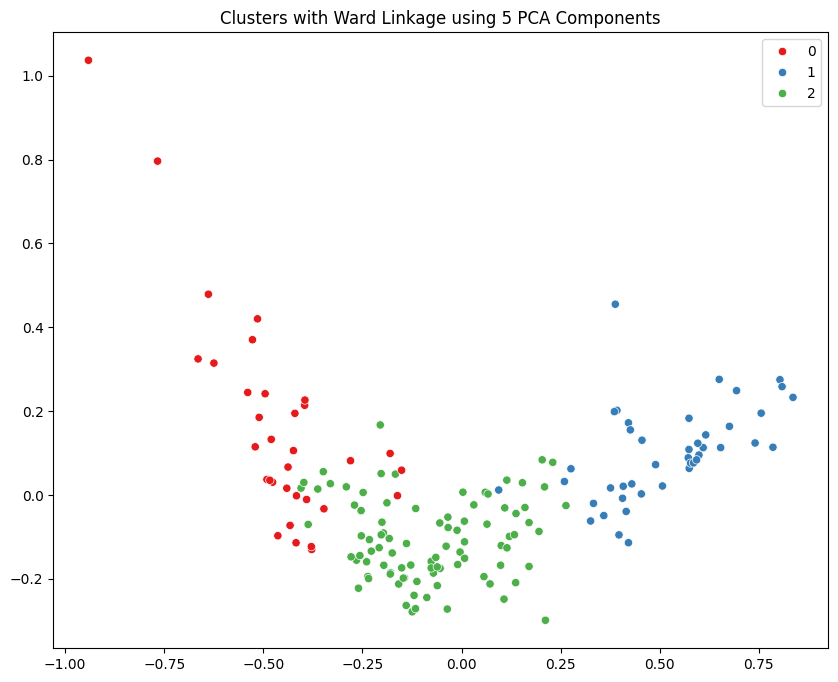

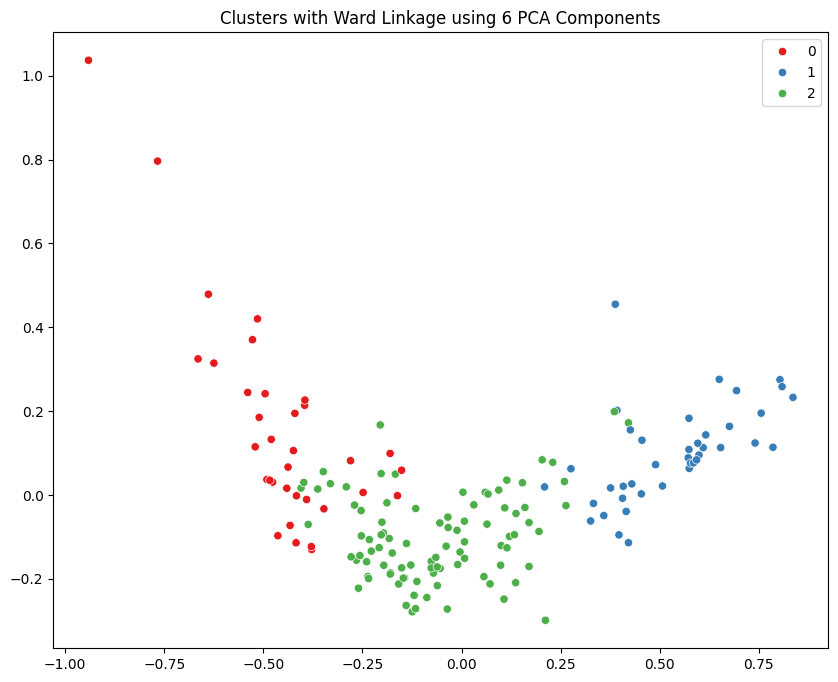

2 PCA Components - Silhouette Score: 0.42315704849454316, Davies-Bouldin Index: 0.7429576675651784
3 PCA Components - Silhouette Score: 0.39826966764598737, Davies-Bouldin Index: 0.8591501962900453
4 PCA Components - Silhouette Score: 0.37837076849489604, Davies-Bouldin Index: 1.0664401902252072
5 PCA Components - Silhouette Score: 0.3619029489480269, Davies-Bouldin Index: 1.0962458645469184
6 PCA Components - Silhouette Score: 0.33967868048762695, Davies-Bouldin Index: 1.1325565478485722


In [45]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

pca_results = {}

# Experiment with different numbers of PCA components (e.g., 2, 3, 4, 5, 6)
for n_components in [2, 3, 4, 5, 6]:
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(df_scaled)
    
    # Perform hierarchical clustering with Ward linkage
    hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
    labels = hc.fit_predict(pca_components)
    
    # Calculate metrics
    silhouette_avg = silhouette_score(pca_components, labels)
    db_score = davies_bouldin_score(pca_components, labels)
    
    # Store the results
    pca_results[n_components] = {'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': db_score}
    
    # Visualize the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='Set1')
    plt.title(f'Clusters with Ward Linkage using {n_components} PCA Components')
    plt.show()

# Display the metrics
for n_components, metrics in pca_results.items():
    print(f'{n_components} PCA Components - Silhouette Score: {metrics["Silhouette Score"]}, '
          f'Davies-Bouldin Index: {metrics["Davies-Bouldin Index"]}')

Based on the metrics provided for different numbers of PCA components, here's an analysis and conclusion regarding the optimal number of components for hierarchical clustering:

### Analysis of Clustering Metrics:

1. **Silhouette Score:**
   - **2 PCA Components:** 0.4232
   - **3 PCA Components:** 0.3983
   - **4 PCA Components:** 0.3784
   - **5 PCA Components:** 0.3619
   - **6 PCA Components:** 0.3397
   
   The Silhouette Score decreases as the number of PCA components increases. The highest Silhouette Score is observed with 2 PCA components. This suggests that with fewer components, the clusters are more compact and well-separated.

2. **Davies-Bouldin Index:**
   - **2 PCA Components:** 0.7430
   - **3 PCA Components:** 0.8592
   - **4 PCA Components:** 1.0664
   - **5 PCA Components:** 1.0962
   - **6 PCA Components:** 1.1326
   
   The Davies-Bouldin Index increases with the number of PCA components. A lower Davies-Bouldin Index indicates better clustering, and the lowest value is with 2 PCA components.

### Interpretation:

- **Best Performance with 2 PCA Components:**
  - The combination of the highest Silhouette Score and the lowest Davies-Bouldin Index occurs with 2 PCA components. This suggests that when the data is reduced to 2 principal components, the clustering algorithm can better distinguish between different clusters.
  - The higher Silhouette Score indicates that the clusters are well-defined and separate, while the lower Davies-Bouldin Index implies that the clusters are compact and distinct from each other.

- **Decreasing Quality with More Components:**
  - As the number of PCA components increases, both the Silhouette Score decreases and the Davies-Bouldin Index increases. This trend indicates that adding more components leads to less distinct and more overlapping clusters.
  - This might happen because the additional components introduce noise or irrelevant information that doesn’t contribute significantly to the clustering process.

In [46]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659])

#### 5.2 Elbow Method to Determine Optimal Number of Clusters

We'll use the Elbow method to determine the optimal number of clusters for K-Means:

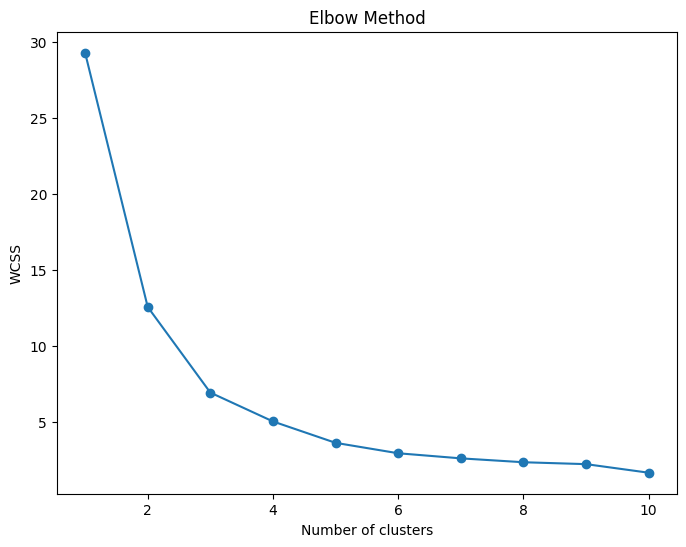

In [47]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)  # Start with 2 components for visualization
pca_components = pca.fit_transform(df_scaled)

# Add PCA components to DataFrame
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



#### 5.3 Clustering with K-Means

Based on the Elbow method, we'll select the optimal number of clusters and apply K-Means clustering:

In [48]:
# Assume the optimal number of clusters is determined as k (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = df['Cluster']


### 6. Clustering Analysis

We'll visualize the clusters and interpret the results:

In [54]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


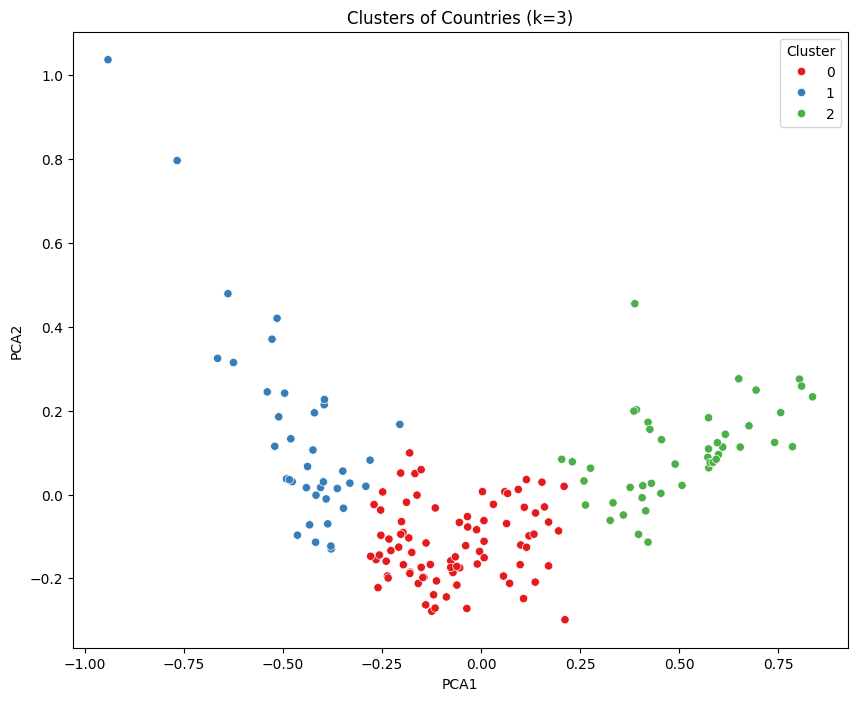

         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         23.054762  38.417726  6.295833  45.226975  12310.595238   7.921976   
1          5.271053  61.323684  8.584474  54.578947  44210.526316   2.480395   
2         94.537778  29.062444  6.292444  43.502222   3312.733333  11.997000   

         life_expec  total_fer          gdpp  
Cluster                                       
0         72.509524   2.351310   6592.880952  
1         79.660526   1.716053  40465.789474  
2         59.220000   5.102000   1633.600000  


In [55]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1')
plt.title(f'Clusters of Countries (k={optimal_clusters})')
plt.show()



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Perform the groupby and mean operation on numeric columns only
grouped_means = numeric_df.groupby('Cluster').mean()

print(grouped_means)

The table you provided shows the mean values of various features for each cluster in your dataset after applying clustering. Let's break down what these numbers represent for each cluster:

### Cluster Analysis:

1. **Cluster 0**:
   - **child_mort**: 23.05 (Mean child mortality rate per 1,000 live births)
   - **exports**: 38.42 (Mean percentage of GDP from exports)
   - **health**: 6.30 (Mean percentage of GDP spent on health)
   - **imports**: 45.23 (Mean percentage of GDP from imports)
   - **income**: $12,310.60 (Mean income per person in USD)
   - **inflation**: 7.92% (Mean inflation rate)
   - **life_expec**: 72.51 years (Mean life expectancy)
   - **total_fer**: 2.35 (Mean total fertility rate)
   - **gdpp**: $6,592.88 (Mean GDP per capita in USD)

   **Interpretation**: Cluster 0 seems to represent countries with moderate child mortality rates, moderate income levels, and average economic indicators. The life expectancy is moderate, indicating developing economies with room for improvement.

2. **Cluster 1**:
   - **child_mort**: 5.27 (Mean child mortality rate per 1,000 live births)
   - **exports**: 61.32 (Mean percentage of GDP from exports)
   - **health**: 8.58 (Mean percentage of GDP spent on health)
   - **imports**: 54.58 (Mean percentage of GDP from imports)
   - **income**: $44,210.53 (Mean income per person in USD)
   - **inflation**: 2.48% (Mean inflation rate)
   - **life_expec**: 79.66 years (Mean life expectancy)
   - **total_fer**: 1.72 (Mean total fertility rate)
   - **gdpp**: $40,465.79 (Mean GDP per capita in USD)

   **Interpretation**: Cluster 1 represents wealthier countries with high income, low child mortality rates, high life expectancy, and stable economic conditions. This cluster likely includes developed countries with strong economies and high standards of living.

3. **Cluster 2**:
   - **child_mort**: 94.54 (Mean child mortality rate per 1,000 live births)
   - **exports**: 29.06 (Mean percentage of GDP from exports)
   - **health**: 6.29 (Mean percentage of GDP spent on health)
   - **imports**: 43.50 (Mean percentage of GDP from imports)
   - **income**: $3,312.73 (Mean income per person in USD)
   - **inflation**: 11.99% (Mean inflation rate)
   - **life_expec**: 59.22 years (Mean life expectancy)
   - **total_fer**: 5.10 (Mean total fertility rate)
   - **gdpp**: $1,633.60 (Mean GDP per capita in USD)

   **Interpretation**: Cluster 2 likely represents less developed or developing countries with high child mortality rates, low income, low life expectancy, and high fertility rates. The high inflation rate suggests economic instability.

### General Insights:

- **Cluster 1**: Appears to represent developed, high-income countries with strong economic performance and high living standards.
- **Cluster 0**: Likely includes countries in transition or moderately developed nations with average economic and health indicators.
- **Cluster 2**: Represents underdeveloped or developing nations with significant challenges in health, income, and economic stability.

These clusters can be used to understand how countries are grouped based on their socio-economic and health indicators, allowing for targeted analysis and policy-making based on the characteristics of each cluster.